<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Sample-complexity/Gaussian/Gaussian_conv_sink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian distribution

Notebook for convergence of the Sinkhorn divergence

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Set saving path (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Sample Complexity/'

### Imports

In [ ]:
import numpy as np

### Sinkhorn divergence convergence

Calculate Sinkhorn divergence for fixed $d=1$ and varying $n$:

In [ ]:
np.random.seed(111)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]       # number of simulated samples - powers of 2
num = 25                                # numbers of repetitions for MC and RQMC
theta = np.ones(1)                      # true theta
d = len(theta)                          # dimensions of data
s = 2                                   # standard deviation of the model
e = 2                                   # parameter for Sinkhorn divergence
inv = True                              # True: use inverse transform, False: use Box-Muller transform
method = 'sinkhorn_stabilized'          # 'sinkhorn' or 'sinkhorn_stabilized' or 'sinkhorn_epsilon_scaling'
cost = 'sqeuclidean'                    # distance used for ground cost ('euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’)
sobol = True                            # 'True': Sobol points, 'False': Halton sequence

Define the QMC sequence:

In [ ]:
if sobol:
  qmc = qmcpy.Sobol(d)
  qmc_1 = qmcpy.Sobol(d+1) # for odd numbers of parameters
else:
  qmc = qmcpy.Halton(d)
  qmc_1 = qmcpy.Halton(d+1) # for odd numbers of parameters

Calculate Sinkhorn divergence for varying $n$:

In [ ]:
if inv:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_inv('gaussian',n,num,d,e,theta,s=2, method=method,cost=cost,sobol=sobol)
else:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv('gaussian',n,num,d,e,theta,s=2, method=method,cost=cost,sobol=sobol)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the Sinkhorn divergence against $n$:

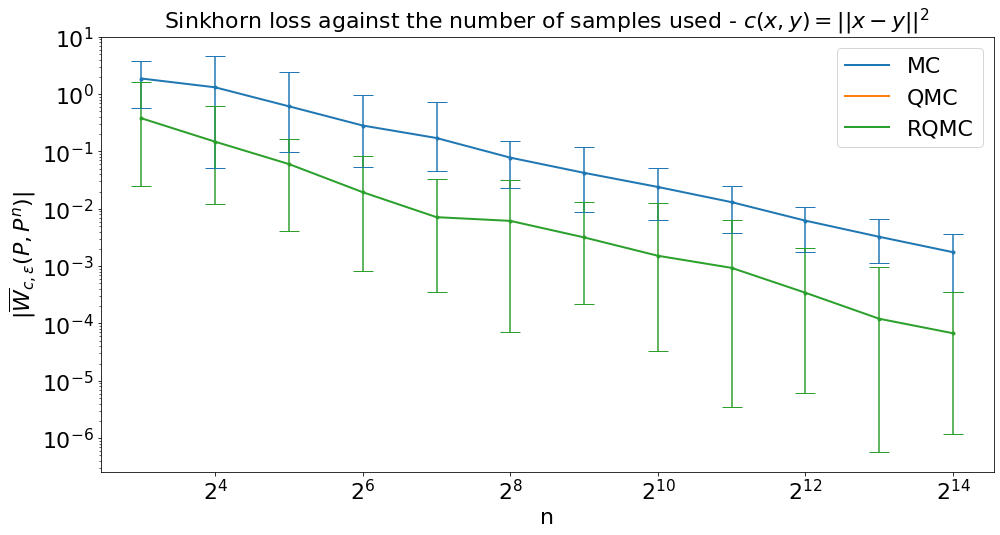

In [ ]:
plot_sink_conv(d,(16,8),sink_mc,sink_qmc,sink_rqmc,'MC','QMC','RQMC',sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc)

In [ ]:
if sobol:
  np.savez(path+"gaussian_sink_n_d=1_e=%s_sobol.npz" %e, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)
else:
  np.savez(path+"gaussian_sink_n_d=1_e=%s.npz" %e, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)

Calculate Sinkhorn divergence for fixed $n=m$ and varying $d$:

In [ ]:
np.random.seed(111)

Set parameters:

In [ ]:
n = 2**13                                     # number of simulated samples - powers of 2
#n = 2**6                                     # number of simulated samples - powers of 2
num = 25                                      # numbers of repetitions for MC and RQMC
#d = [1,2,4,6,8,10,15,20,25,30]               # dimensions of data
d = [1,5,10,15,20,25,50,75,100,150,200,300]   # dimensions of data
theta = np.ones(np.max(d))                    # true theta
s = 2                                         # standard deviation of the model
e = 2                                         # parameter for Sinkhorn divergence
inv = True                                    # True: use inverse transform, False: use Box-Muller transform
eadapt = True                                 # True: e is proportional to d^{1/2}
method = 'sinkhorn_stabilized'                # 'sinkhorn' or 'sinkhorn_stabilized' or 'sinkhorn_epsilon_scaling'
cost = 'sqeuclidean'                        # distance used for ground cost ('euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’)
sobol = True                            # 'True': Sobol points, 'False': Halton sequence

Define the QMC sequence:

In [ ]:
if sobol:
  qmc = qmcpy.Sobol(np.max(d))
  qmc_1 = qmcpy.Sobol(np.max(d)+1) # for odd numbers of parameters
else:
  qmc = qmcpy.Halton(np.max(d))
  qmc_1 = qmcpy.Halton(np.max(d)+1) # for odd numbers of parameters

Calculate Sinkhorn divergence for varying $d$:

In [ ]:
if inv:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_inv_d('gaussian',n,num,d,e,theta,s=2,eadapt=eadapt,method=method,cost=cost,sobol=sobol)
else:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_d('gaussian',n,num,d,e,theta,s=2,eadapt=eadapt,method=method,cost=cost,sobol=sobol)

Plot the Sinkhorn divergence against $n$:

In [ ]:
plot_sink_conv_d(d,(16,8),sink_mc,sink_qmc,sink_rqmc,'MC','QMC','RQMC',sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc)

In [ ]:
if sobol:
  np.savez(path+"gaussian_sink_d_n=8192_e=%sd_sobol.npz" %e, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)
else:
  np.savez(path+"gaussian_sink_d_n=8192_e=%sd.npz" %e, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)